In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
import seaborn as sns
import matplotlib.patches as mpatches

In [2]:
df = pd.read_excel('dados/dados.xlsx')

In [3]:
df['Dia'] = pd.to_datetime(df['Dia'], format='%d/%m/%Y')

In [4]:
# fazer a coluna 'Falha Pag' seja booleano, ela tem valores 'Sim' e 'Não'
df['Falha Pag'] = df['Falha Pag'].map({'Sim': True, 'Não': False})


# Gráfico

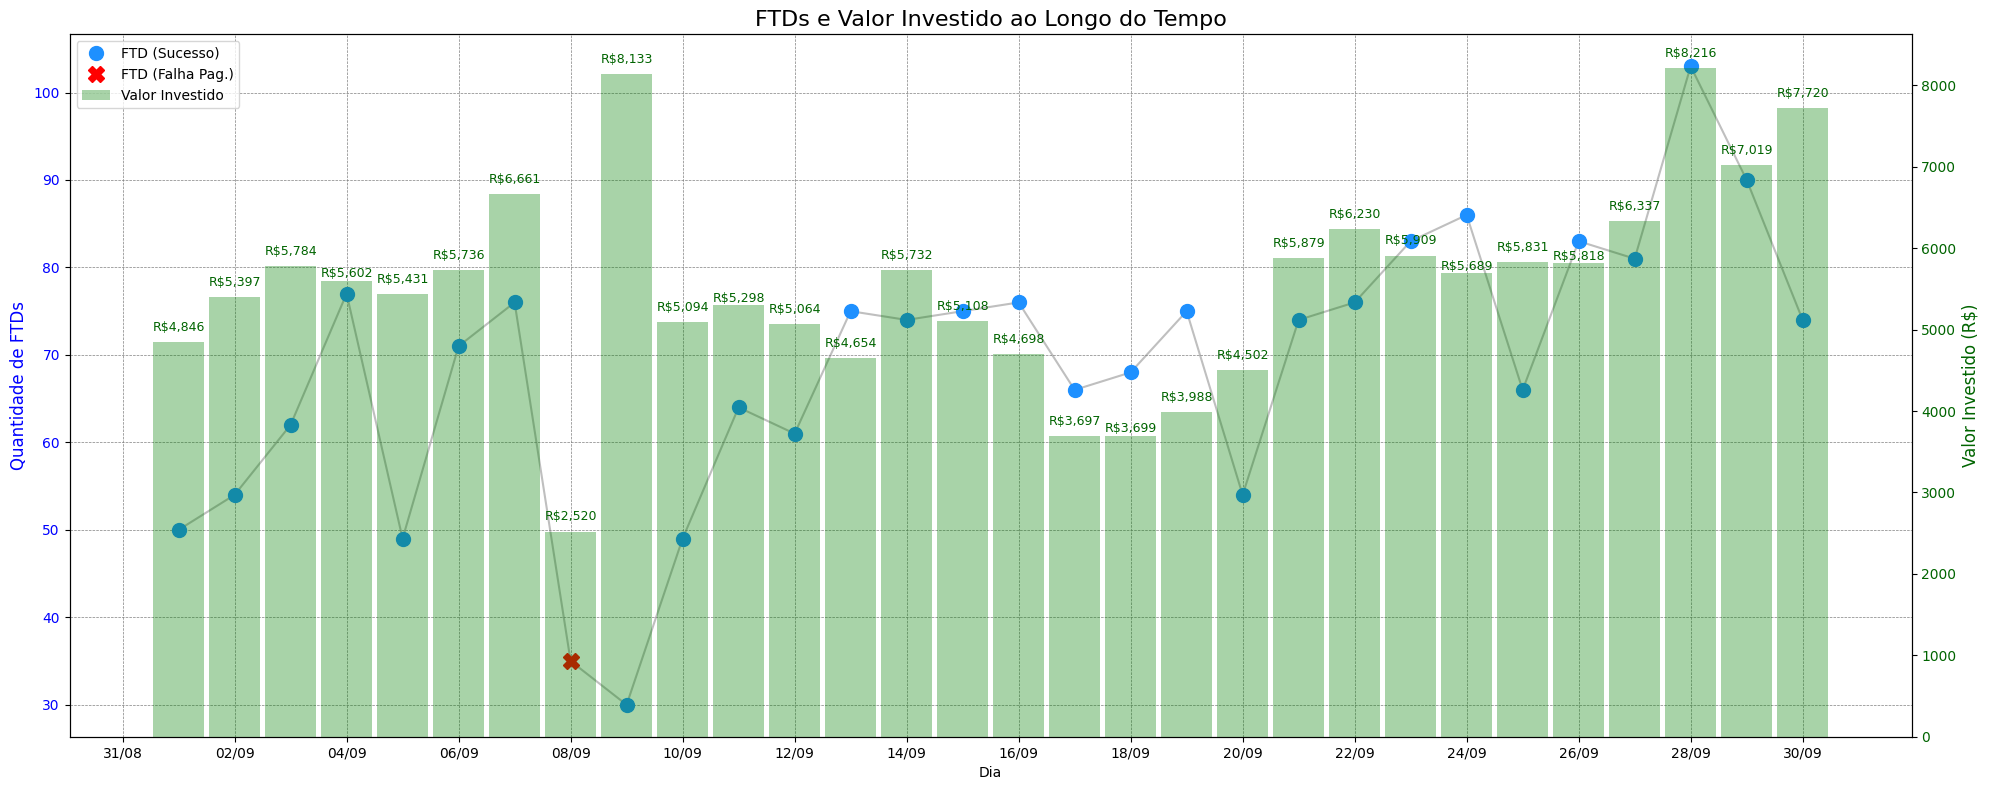

In [ ]:
fig, ax1 = plt.subplots(figsize=(20, 8))

df_sucesso = df[~df['Falha Pag']]
df_falha = df[df['Falha Pag']]

ax1.plot(df['Dia'], df['FTDs'], color='gray', linestyle='-', alpha=0.5, label='_nolegend_')

ax1.plot(df_sucesso['Dia'], df_sucesso['FTDs'],
         marker='o', linestyle='None', color='dodgerblue', markersize=10, label='FTD (Sucesso)')

if not df_falha.empty:
    ax1.plot(df_falha['Dia'], df_falha['FTDs'],
             marker='X', linestyle='None', color='red', markersize=12, label='FTD (Falha Pag.)')

ax1.set_xlabel('Dia')
ax1.set_ylabel('Quantidade de FTDs', color='blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()

ax2.bar(df['Dia'], df['Valor investido'], color='green', alpha=0.34, label='Valor Investido', width=0.9)

ax2.set_ylabel('Valor Investido (R$)', color='darkgreen', fontsize=12)
ax2.tick_params(axis='y', labelcolor='darkgreen')

vertical_offset_high = 100
vertical_offset_low = 1
difference_threshold = 250
offsets = [vertical_offset_high] * len(df)

for i in range(1, len(df)):
    current_value = df['Valor investido'].iloc[i]
    previous_value = df['Valor investido'].iloc[i-1]
    
    if abs(current_value - previous_value) < difference_threshold:
        if offsets[i-1] == vertical_offset_high:
            offsets[i] = vertical_offset_low

for i in range(len(df)):
    offset = offsets[i]
    ax2.text(df['Dia'].iloc[i], 
             df['Valor investido'].iloc[i] + offset, 
             f"R${df['Valor investido'].iloc[i]:,.0f}", 
             ha='center', 
             va='bottom', 
             color='darkgreen', 
             fontsize=9)

plt.title('FTDs e Valor Investido ao Longo do Tempo', fontsize=16)
ax1.grid(True, which='major', linestyle='--', linewidth='0.5', color='grey')

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=2))
plt.xticks(rotation=45)

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

fig.tight_layout()
plt.show()